### 作業目的: 使用樹型模型進行文章分類

本次作業主利用[Amazon Review data中的All Beauty](https://nijianmo.github.io/amazon/index.html)來進行review評價分類(文章分類)

資料中將review分為1,2,3,4,5分，而在這份作業，我們將評論改分為差評價、普通評價、優良評價(1,2-->1差評、3-->2普通評價、4,5-->3優良評價)

* data 下載連結: http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/All_Beauty.json.gz

### 載入套件

In [111]:
import json
import re
from icecream import ic
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

### 資料前處理
文本資料較為龐大，這裡我們取前10000筆資料來進行作業練習

In [16]:
#load json data
all_reviews = []
with open('All_Beauty.json', 'r') as f:
    counter = 1
    for review in f:
        if counter < 10001:
            all_reviews.append(json.loads(review))
            counter += 1
        else:
            break
        
len(all_reviews), all_reviews[0]

(10000,
 {'overall': 1.0,
  'verified': True,
  'reviewTime': '02 19, 2015',
  'reviewerID': 'A1V6B6TNIC10QE',
  'asin': '0143026860',
  'reviewerName': 'theodore j bigham',
  'reviewText': 'great',
  'summary': 'One Star',
  'unixReviewTime': 1424304000})

In [40]:
all_reviews[0]['reviewText'], all_reviews[0]['overall'] 

('great', 1.0)

In [59]:
unique_overall = []
unique_reviewText = []

for review in all_reviews:
    rating = review['overall']
        
    if review['overall'] not in unique_val:
        unique_val.append(rating)
        unique_val.sort()
    else:
        pass
    
    if reviewText not in unique_reviewText:
        unique_reviewText.append(reviewText)
    else:
        pass

In [65]:
ic(unique_val)
ic(unique_reviewText[:3])
ic(len(unique_reviewText))

ic| unique_val: [1.0, 2.0, 3.0, 4.0, 5.0]
ic| unique_reviewText[:3]: ['great',
                            'My  husband wanted to reading about the Negro Baseball and this a great '
                            'addition to his library
                           '
                            " Our library doesn't haveinformation so this book is his start. Tthank you",
                            'This book was very informative, covering all aspects of game.']
ic| len(unique_reviewText): 9506


9506

In [101]:
#parse label(overall) and corpus(reviewText)
corpus = []
labels = []

###<your code>###
for review in all_reviews:
    try:
        corpus.append(review['reviewText'])
        labels.append(review['overall'])  # 若沒有評論, 同時也不將 overall 新增到 labels
    except:
        pass
    
ic(len(labels))
ic(labels[:5])
ic(len(corpus))
ic(corpus[:3])

#transform labels: 1,2 --> 1 and 3 --> 2 and 4,5 --> 3
###<your code>###
for idx, label in enumerate(labels):
    if label in [1.0, 2.0]:
        labels[idx] = 1
    elif label == 3.0:
        labels[idx] = 2
    else:
        labels[idx] = 3
        
ic(len(labels))
ic(set(labels))

ic| len(labels): 9995
ic| labels[:5]: [1.0, 4.0, 4.0, 5.0, 5.0]
ic| len(corpus): 9995
ic| corpus[:3]: ['great',
                 'My  husband wanted to reading about the Negro Baseball and this a great '
                 'addition to his library
                '
                 " Our library doesn't haveinformation so this book is his start. Tthank you",
                 'This book was very informative, covering all aspects of game.']
ic| len(labels): 9995
ic| set(labels): {1, 2, 3}


{1, 2, 3}

In [102]:
#preprocessing data
#remove email address, punctuations, and change line symbol(\n)

###<your code>###
for idx, text in enumerate(corpus):
    corpus[idx] = re.sub(r'\w+@\w+.\w+.\w+|\W+|\n', ' ', text)

In [103]:
corpus[:5]

['great',
 'My husband wanted to reading about the Negro Baseball and this a great addition to his library Our library doesn t haveinformation so this book is his start Tthank you',
 'This book was very informative covering all aspects of game ',
 'I am already a baseball fan and knew a bit about the Negro leagues but I learned a lot more reading this book ',
 'This was a good story of the Black leagues I bought the book to teach in my high school reading class I found it very informative and exciting I would recommend to anyone interested in the history of the black leagues It is well written unlike a book of facts The McKissack s continue to write good books for young audiences that can also be enjoyed by adults ']

In [127]:
#split corpus and label into train and test
###<your code>###
x_train, x_test, y_train, y_test = train_test_split(corpus, labels, test_size=0.2)
len(x_train), len(x_test), len(y_train), len(y_test)

(7996, 1999, 7996, 1999)

In [128]:
#change corpus into vector
#you can use tfidf or BoW here

###<your code>###
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

#transform training and testing corpus into vector form
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

In [130]:
ic(x_train.shape)
ic(x_test.shape)  # 9804(n_features) 必須相同

ic| x_train.shape: (7996, 9804)
ic| x_test.shape: (1999, 9804)


(1999, 9804)

### 訓練與預測

## 決策樹

In [141]:
#build classification model (decision tree, random forest, or adaboost)
#start training

###<your code>###
tree = DecisionTreeClassifier(criterion='gini', max_depth=6)
tree.fit(x_train, y_train)

#start inference
y_pred = tree.predict(x_test)

#calculate accuracy
###<your code>###
print(f'Accuracy: {tree.score(x_test, y_test)}')
print('--------------')
#calculate confusion matrix, precision, recall, and f1-score
print(classification_report(y_test, y_pred))
print('--------------')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9034517258629314
--------------
              precision    recall  f1-score   support

           1       0.61      0.22      0.32       127
           2       0.00      0.00      0.00        79
           3       0.91      0.99      0.95      1793

    accuracy                           0.90      1999
   macro avg       0.51      0.40      0.42      1999
weighted avg       0.86      0.90      0.87      1999

--------------
[[  28    3   96]
 [   6    0   73]
 [  12    3 1778]]


由上述資訊可以發現, 模型在好評的準確度高(precision, recall都高), 而在差評的部分表現較不理想, 在普通評價的部分大部分跟差評搞混,
同學可以試著學習到的各種方法來提升模型的表現

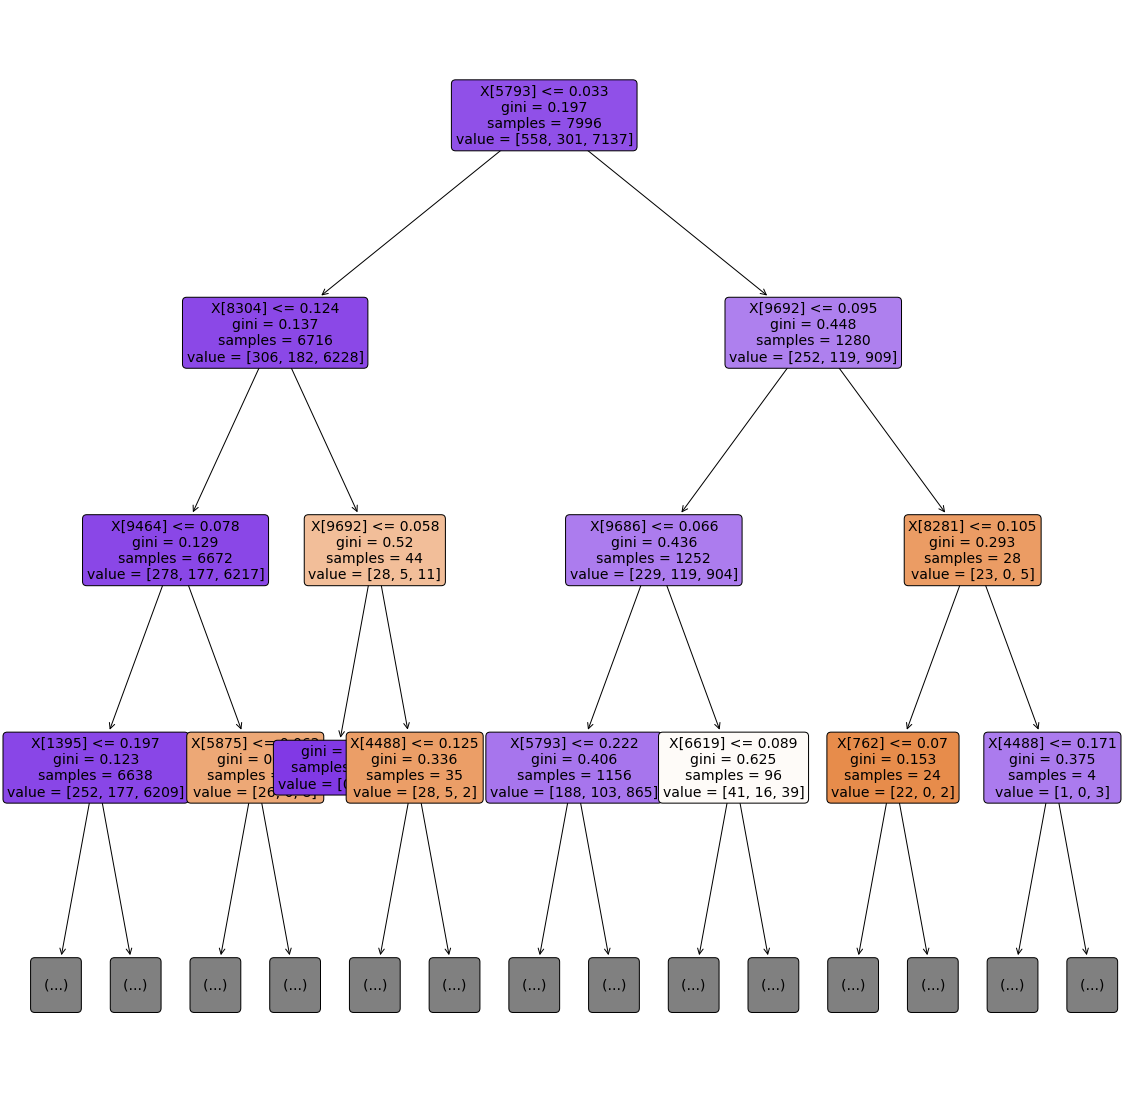

In [152]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(tree, max_depth=3, filled=True, rounded=True, fontsize=14);

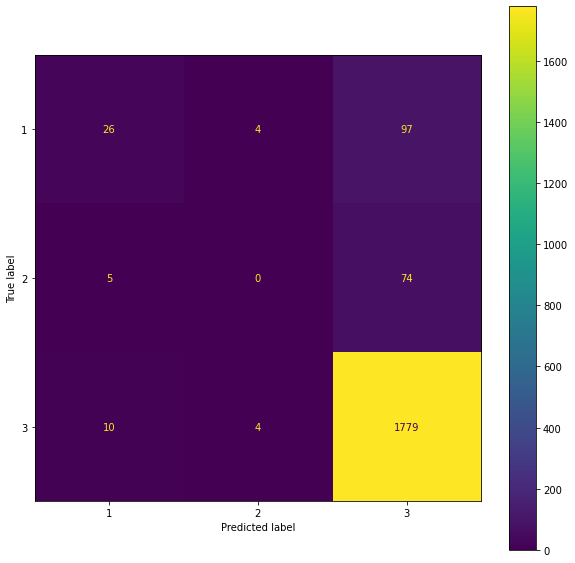

In [139]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(tree, x_test, y_test, ax=ax);

---
## 隨機森林

Accuracy: 0.8969484742371185


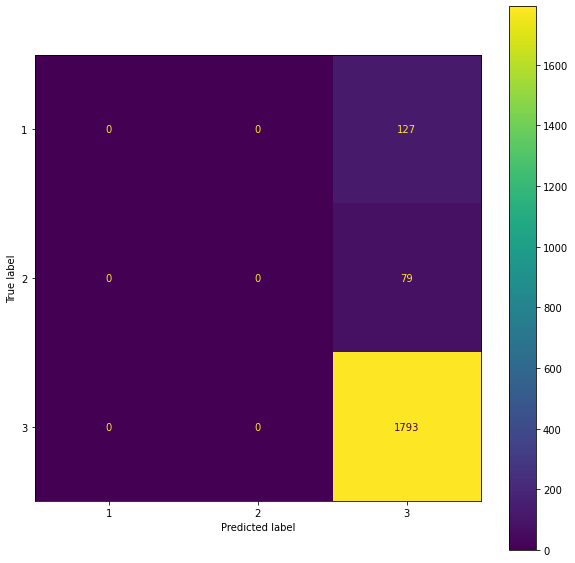

In [174]:
forest = RandomForestClassifier(n_estimators=50,                                     
                                criterion='gini',
                                max_depth=6)
forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)

print(f'Accuracy: {forest.score(x_test, y_test)}')

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(forest, x_test, y_test, ax=ax);

---
## 決策樹 + AdaBoost

Accuracy: 0.897448724362181


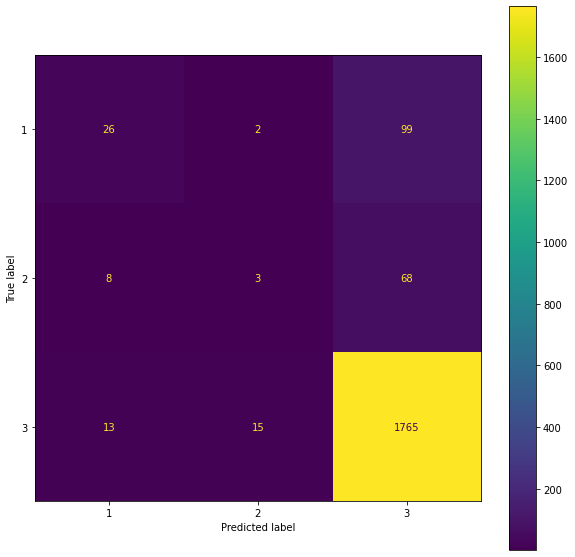

In [172]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',
                                                                    max_depth=6),
                              n_estimators=50,
                              learning_rate=0.8)
adaboost.fit(x_train, y_train)

y_pred = adaboost.predict(x_test)

print(f'Accuracy: {adaboost.score(x_test, y_test)}')

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(adaboost, x_test, y_test, ax=ax);

## 隨機森林 + AdaBoost

Accuracy: 0.9149574787393697


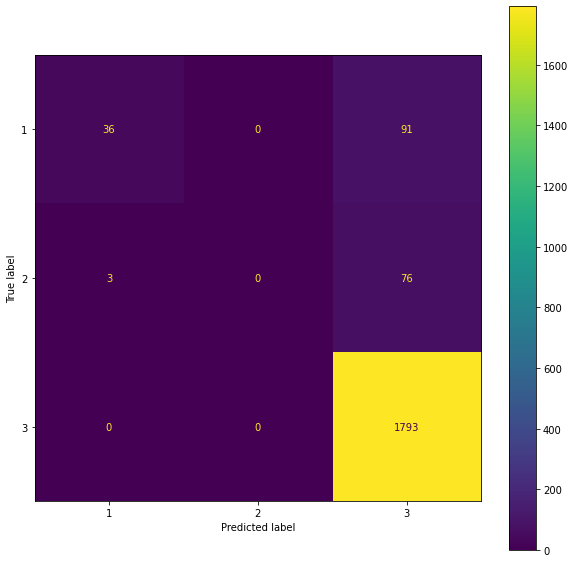

In [173]:
adaboost = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=50, 
                                                                    criterion='gini',
                                                                    max_depth=6),
                              n_estimators=50,
                              learning_rate=0.8)
adaboost.fit(x_train, y_train)

y_pred = adaboost.predict(x_test)

print(f'Accuracy: {adaboost.score(x_test, y_test)}')

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(adaboost, x_test, y_test, ax=ax);

## Accuracy


* 決策樹 : 0.903
    *   \+ AdaBoost: 0.8974 (反而變低)


* 隨機森林 0.896
    *   \+ AdaBoost: 0.9149